In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle
import copy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
wrs = pickle.load(open("../data/qbs_career.pkl","rb"))

In [6]:
y = wrs["Rate_x"]
X = wrs.loc[:,"Cmp_y":"Conf"]

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.8, random_state=29)

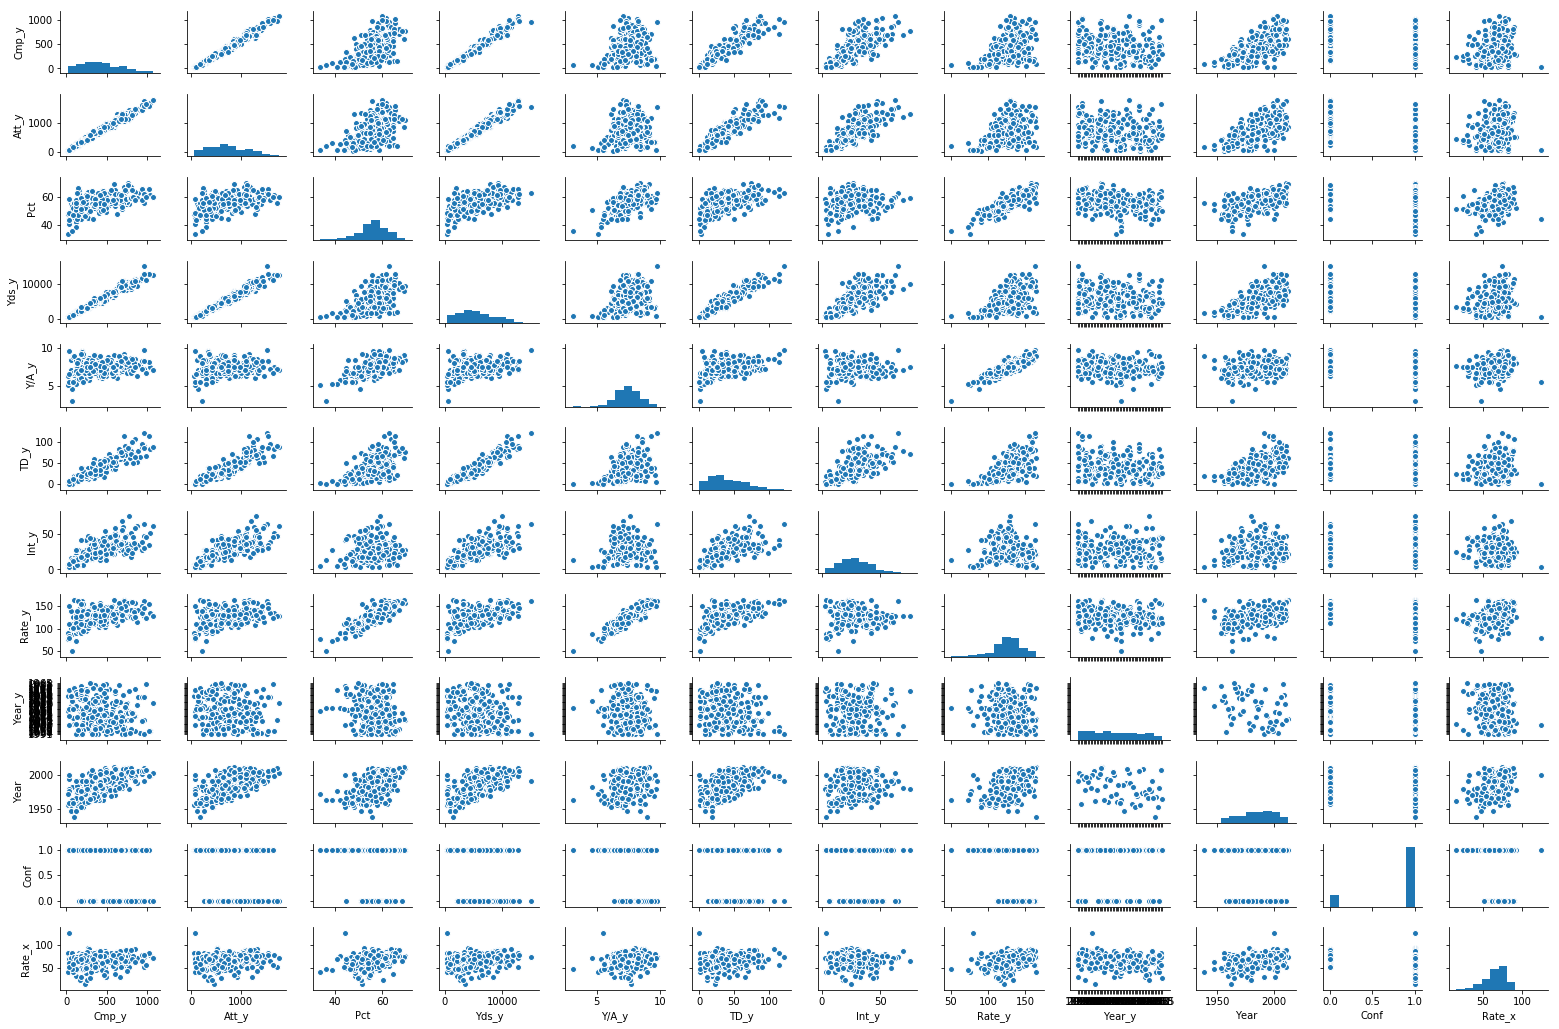

In [7]:
data = X_train.merge(pd.DataFrame(y_train), left_index = True, right_index = True)
data = data.dropna()
sns.pairplot(data, size = 1.2, aspect=1.5);

In [39]:
lm = smf.ols('Rate_x ~ Rate_y + Yds_y + TD_y + Pct + Att_y + Cmp_y + Int_y + Year + Conf', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rate_x   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     5.502
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           7.51e-07
Time:                        01:21:21   Log-Likelihood:                -945.01
No. Observations:                 238   AIC:                             1910.
Df Residuals:                     228   BIC:                             1945.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -560.0864    166.308     -3.368      0.001    -887.783    -232.390
Conf[T.True]    -2.1393      2.469     -0.867      0.387      -7.004       2.725
Rate_y          -0.1933      0.144     -1.342      0.181      -0.477       0.090
Yds_y            0.0018      0.002      0.756      0.451      -0.003       0.007
TD_y             0.0915      0.126      0.724      0.470      -0.158       0.340
Pct              0.7338      0.487      1.508      0.133      -0.225       1.692
Att_y           -0.0158      0.026     -0.615      0.539      -0.066       0.035
Cmp_y           -0.0081      0.051     -0.159      0.874      -0.108       0.092
Int_y           -0.0691      0.136     -0.507      0.613      -0.338       0.200
Year             0.3099      0.086      3.619      0.000       0.141       0.479
==============================================================================
Omnibus:                       14.337   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.098
Skew:                          -0.396   Prob(JB):                     2.62e-05
Kurtosis:                       4.224   Cond. No.                     1.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
lm = smf.ols('Rate_x ~ Pct + Year', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rate_x   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           1.68e-09
Time:                        01:36:50   Log-Likelihood:                -947.94
No. Observations:                 238   AIC:                             1902.
Df Residuals:                     235   BIC:                             1912.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -496.2880    119.074     -4.168      0.000    -730.876    -261.699
Pct            0.3442      0.169      2.038      0.043       0.011       0.677
Year           0.2738      0.062      4.395      0.000       0.151       0.397
==============================================================================
Omnibus:                       16.753   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.707
Skew:                          -0.300   Prob(JB):                     1.07e-08
Kurtosis:                       4.828   Cond. No.                     2.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
lm = smf.ols('Rate_x ~ Rate_y + Yds_y + TD_y + Pct + Att_y + Year + Conf', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rate_x   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     7.090
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           1.13e-07
Time:                        23:44:21   Log-Likelihood:                -945.15
No. Observations:                 238   AIC:                             1906.
Df Residuals:                     230   BIC:                             1934.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -604.7237    140.322     -4.310      0.000    -881.204    -328.244
Conf[T.True]    -2.3092      2.434     -0.949      0.344      -7.106       2.488
Rate_y          -0.1772      0.118     -1.506      0.133      -0.409       0.055
Yds_y            0.0016      0.002      0.755      0.451      -0.003       0.006
TD_y             0.0902      0.120      0.750      0.454      -0.147       0.327
Pct              0.6854      0.289      2.370      0.019       0.116       1.255
Att_y           -0.0213      0.014     -1.469      0.143      -0.050       0.007
Year             0.3328      0.073      4.576      0.000       0.189       0.476
==============================================================================
Omnibus:                       14.291   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.841
Skew:                          -0.399   Prob(JB):                     2.98e-05
Kurtosis:                       4.211   Cond. No.                     1.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
lm = smf.ols('Rate_x ~ Rate_y + Pct + Att_y + Year', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rate_x   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     11.66
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           1.20e-08
Time:                        23:47:44   Log-Likelihood:                -946.68
No. Observations:                 238   AIC:                             1903.
Df Residuals:                     233   BIC:                             1921.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -602.3873    139.357     -4.323      0.000    -876.948    -327.827
Rate_y        -0.0441      0.080     -0.554      0.580      -0.201       0.113
Pct            0.5068      0.265      1.914      0.057      -0.015       1.029
Att_y         -0.0041      0.003     -1.455      0.147      -0.010       0.001
Year           0.3270      0.072      4.528      0.000       0.185       0.469
==============================================================================
Omnibus:                       16.278   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.487
Skew:                          -0.367   Prob(JB):                     3.95e-07
Kurtosis:                       4.561   Cond. No.                     3.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
lm = smf.ols('Rate_x ~  Pct + Year', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rate_x   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.04
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           1.68e-09
Time:                        23:48:30   Log-Likelihood:                -947.94
No. Observations:                 238   AIC:                             1902.
Df Residuals:                     235   BIC:                             1912.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -496.2880    119.074     -4.168      0.000    -730.876    -261.699
Pct            0.3442      0.169      2.038      0.043       0.011       0.677
Year           0.2738      0.062      4.395      0.000       0.151       0.397
==============================================================================
Omnibus:                       16.753   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.707
Skew:                          -0.300   Prob(JB):                     1.07e-08
Kurtosis:                       4.828   Cond. No.                     2.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
lm = smf.ols('Rate_x ~  Pct + Year', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rate_x   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     14.72
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           8.15e-09
Time:                        23:49:04   Log-Likelihood:                -947.82
No. Observations:                 238   AIC:                             1904.
Df Residuals:                     234   BIC:                             1918.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -977.9306   1010.239     -0.968      0.334   -2968.256    1012.395
Pct            8.9281     17.880      0.499      0.618     -26.297      44.154
Year           0.5169      0.510      1.013      0.312      -0.488       1.522
Pct:Year      -0.0043      0.009     -0.480      0.632      -0.022       0.013
==============================================================================
Omnibus:                       16.925   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.039
Skew:                          -0.329   Prob(JB):                     2.46e-08
Kurtosis:                       4.760   Cond. No.                     1.33e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))
print(mean_squared_error(y_test,lr.predict(X_test)))

163.894444211479
202.61144260959162


In [54]:
lr = Lasso()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))
print(mean_squared_error(y_test,lr.predict(X_test)))

165.7230371011532
207.1314488201901


/home/leaferickson/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [55]:
lr = Ridge()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))
print(mean_squared_error(y_test,lr.predict(X_test)))

163.90022027084441
203.01043023208516


In [56]:
lr = ElasticNet()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))
print(mean_squared_error(y_test,lr.predict(X_test)))

165.38784784817707
207.61831972893654


/home/leaferickson/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [67]:
X2 = X_train[["Pct", "Year", "Att_y", "Year"]]
X2["int"] = 1
lr = LinearRegression()
lr.fit(X2, y_train)
print(mean_squared_error(y_train,lr.predict(X2)))
X3 = X_test[["Pct", "Year", "Att_y", "Year"]]
X3["int"] = 1
print(mean_squared_error(y_test,lr.predict(X3)))

167.13019145938483
209.91485840128692


/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
